In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from foottraffic.awb_model.models import MFF, MetaData, Prior, PositivePrior
from foottraffic.awb_model.types import ContUniDist, Distribution, ContDist, PosDist
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_mff = MFF.from_bundle('dataset')

In [4]:
analytic_df = test_mff.analytic_dataframe()


In [6]:
my_prior = Prior(dist="MvNormal", params={'mu': np.array([0, 2.]), 'cov': np.array([[1, .8], [.8, 1]])}, dims=('Product',))

In [7]:
with pm.Model(coords={'Product': ['watch', 'jewelry']}) as model:
    x = my_prior.get_pymc_prior("Test")


In [18]:
with pm.Model() as my_model:
    x = PositivePrior(dist=PosDist.halfnormal, params={'sigma': 2}).get_pymc_prior("Help")

array(0.40401909)

(array([[ 15.,  79., 223., 271., 279., 100.,  32.,   1.,   0.,   0.],
        [  0.,   0.,   4.,  33., 133., 286., 292., 185.,  52.,  15.]]),
 array([-2.94314972, -2.14316181, -1.3431739 , -0.543186  ,  0.25680191,
         1.05678981,  1.85677772,  2.65676562,  3.45675353,  4.25674143,
         5.05672934]),
 <a list of 2 BarContainer objects>)

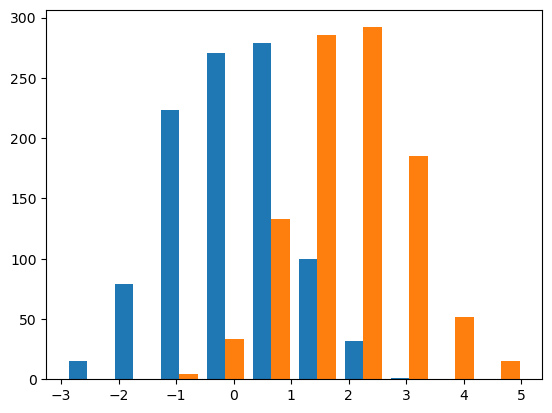

In [15]:
plt.hist(pm.draw(x, 1000), bins=10)

In [52]:
with pm.Model(coords={'Product': ['watch', 'jewelry'], "Period": np.arange(100)}) as model:

    mv_normal = pm.MvNormal("MvNormal", mu=[0, 0], cov=[[1, .2], [.2, 1]], dims=('Period', 'Product'))
    sample = pm.sample(100)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [MvNormal]


d:\MattReda\miniforge\envs\foottraffic\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 31 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [54]:
sample

Inference data with groups:
	> posterior
	> sample_stats